# Lending Club Case Study

### Problem Statement

##### A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Loading Data and Importing Libraries

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("loan.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12768\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#checking the shape of the data
df.shape

(39717, 111)

In [10]:
#checking all the columns with null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Handling and Cleaning

#### It has been observed that there are many columns with null values. Dropping all columns containing null values.

In [12]:
#Now we'll drop all columns whose all values are NaN
df.dropna(axis = 1, how = 'all', inplace = True)

In [14]:
df.shape

(39717, 57)

#### Removing more Unnecessary Columns
**id**: The unique ID is not relevant for the analysis.

**desc**: Loan description is not needed at this stage, unless we perform text-based machine learning models later.

**emp_title**: Job title is not required for this analysis.

**addr_state**: Address-related information is not relevant for the analysis.

**funded_amnt_inv**: Not relevant for this analysis.

**pymnt_plan**: Indicates whether a payment plan is in place for the loan, but not necessary for the analysis.

**member_id**: The unique LC-assigned ID for the borrower is not required for the analysis.

**url**: Not relevant for the analysis.

**zip_code**: Not relevant for the analysis.

**last_credit_pull_d**: The date of the most recent credit pull by LC is not relevant for this analysis.

**out_prncp_inv**: Not relevant for the analysis.

**total_pymnt_inv**: Represents the payments received to date for the portion funded by investors, which is not needed for the analysis.

**funded_amnt**: Not required for the analysis.

**revol_bal**: The total credit revolving balance is not necessary for deciding loan approval.

**out_prncp**: This refers to the outstanding principal, not needed for analysis.

**total_pymnt**: Not required for the analysis.

**total_rec_late_fee**: Not relevant for the analysis.

**recoveries**: Not relevant for the analysis, as this pertains to post-charge-off data.

**collection_recovery_fee**: Not relevant for the analysis, as this pertains to post-charge-off data.

**last_pymnt_d**: The last payment date is not useful for loan approval decisions, as it relates to ongoing loans.

**last_pymnt_amnt**: The last payment amount cannot be used for loan approval decisions, as it pertains to ongoing loans.

**next_pymnt_d**: The next payment date is not relevant for loan approval decisions, as it pertains to ongoing loans.

**mths_since_last_delinq**: The months since the last delinquency are not useful for loan approval decisions, as they relate to ongoing loans.

**mths_since_last_record**: The months since the last public record are not related to loan approval decisions.

**total_rec_prncp**: Principal received to date is not relevant for loan approval decisions.

**total_rec_int**: Interest received to date is not related to loan approval decisions.

**chargeoff_within_12_mths**: Number of charge-offs within 12 months, not relevant for the analysis.

**initial_list_status**: Not relevant for the analysis.

**collections_12_mths_ex_med**: Not rlated to decision making.

**policy_code**: Policy code is not required for decision making.

**acc_now_delinq**: The number of accounts on which the borrower is now delinquent is not required for loan approval decisions.

**application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers, not required for analysis.




In [16]:
df.drop(["id", "desc", "emp_title", "addr_state", "funded_amnt_inv", "pymnt_plan", "member_id", "url", "zip_code", "last_credit_pull_d", "out_prncp_inv", "total_pymnt_inv", "funded_amnt", "revol_bal", "out_prncp", "total_pymnt", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record", "total_rec_prncp", "total_rec_int", "chargeoff_within_12_mths", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "application_type"], axis = 1, inplace = True)

In [18]:
df.shape

(39717, 25)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  title                 39706 non-null  object 
 14  dti                   39717 non-null  float64
 15  delinq_2yrs        

#### Missing Value Treatment

In [21]:
#checking the number of all null values in the column
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
delinq_amnt                0
pub_rec_bankruptcies     697
tax_liens                 39
dtype: int64

In [23]:
#Checking the most common value in the pub_rec_bankruptcies
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [25]:
df['pub_rec_bankruptcies'].mode()[0]

0.0

In [27]:
#Fill up the nulls in the pub_rec_bankruptcies column with the above value
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])

In [29]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [31]:
#checking the nulls in the dataframe again
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
delinq_amnt                0
pub_rec_bankruptcies       0
tax_liens                 39
dtype: int64

In [33]:
#checking the most common value in tax_liens column
df['tax_liens'].value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [35]:
#Removing this column as there is no value present
df.drop(["tax_liens"],axis = 1, inplace = True)

In [37]:
df.shape

(39717, 24)

In [39]:
#checking all null values again
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
delinq_amnt                0
pub_rec_bankruptcies       0
dtype: int64

In [41]:
#dropping the rows which have no value in revol_util
df = df[-(df.revol_util.isnull())]

In [43]:
df.shape

(39667, 24)

In [45]:
#dropping the rows which have no value in title
df = df[-(df.title.isnull())]

In [47]:
df.shape

(39656, 24)

In [49]:
#again dropping the rows which have no value in emp_length since the missing values are in very low percentage and it won't affect much in the analysis.
df = df[-(df.emp_length.isnull())]

In [51]:
df.shape

(38585, 24)

In [53]:
#now checking if still the data has any null values
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
delinq_amnt             0
pub_rec_bankruptcies    0
dtype: int64

In [55]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,delinq_amnt,pub_rec_bankruptcies
count,38585.000000,38585.000000,3.858500e+04,38585.000000,38585.000000,38585.000000,38585.000000,38585.000000,38585.000000,38585.0,38585.000000
mean,11300.071919,326.985442,6.964165e+04,13.329605,0.146845,0.870053,9.323468,0.053389,22.136944,0.0,0.040845
std,7462.009165,209.160595,6.425454e+04,6.665408,0.492321,1.070092,4.393450,0.234073,11.390085,0.0,0.198848
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,0.000000
25%,5500.000000,168.450000,4.150000e+04,8.210000,0.000000,0.000000,6.000000,0.000000,14.000000,0.0,0.000000
50%,10000.000000,283.180000,6.000000e+04,13.420000,0.000000,1.000000,9.000000,0.000000,20.000000,0.0,0.000000
75%,15000.000000,434.750000,8.320000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,29.000000,0.0,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,0.0,2.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38585 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38585 non-null  int64  
 1   term                  38585 non-null  object 
 2   int_rate              38585 non-null  object 
 3   installment           38585 non-null  float64
 4   grade                 38585 non-null  object 
 5   sub_grade             38585 non-null  object 
 6   emp_length            38585 non-null  object 
 7   home_ownership        38585 non-null  object 
 8   annual_inc            38585 non-null  float64
 9   verification_status   38585 non-null  object 
 10  issue_d               38585 non-null  object 
 11  loan_status           38585 non-null  object 
 12  purpose               38585 non-null  object 
 13  title                 38585 non-null  object 
 14  dti                   38585 non-null  float64
 15  delinq_2yrs           38

##### Now that the data has been cleaned, let's perform sanity checks

### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well.
Some sanity checks can be:
    1. Removing the values where loan_status is Current, since we need to check who has defaulted and this can only be done in cases of fully paid or charged off.
    2. revol_util column although described as an object column, it is presented as string.
    3. int_rate column although described as an object column, it is also presented as string.
    4. Imputing 'None' values in home_ownership to 'Others'.

In [59]:
#checking unique target values in loan_status
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [61]:
#Removing current values from dataset as the transaction is still going on
df = df[-(df.loan_status == "Current")]

In [63]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [65]:
#doing necessary changes in revol_util column
def clean_revol(val):
    return str(val.replace("%",""))

In [67]:
clean_revol("20.56%")

'20.56'

In [69]:
df.revol_util = df.revol_util.apply(clean_revol)

In [71]:
df.revol_util.describe()

count     37487
unique     1086
top           0
freq        918
Name: revol_util, dtype: object

In [73]:
df.revol_util.value_counts()

revol_util
0        918
63        61
0.20      61
40.70     56
61        55
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1086, dtype: int64

In [75]:
#doing same changes in int_rate column
def clean_int(val):
    return str(val.replace("%",""))

In [77]:
clean_int("50.99%")

'50.99'

In [88]:
df.int_rate = df.int_rate.apply(clean_int).astype(float)

In [90]:
df.int_rate.value_counts()

int_rate
10.99    891
11.49    765
7.51     756
13.49    736
7.88     701
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: count, Length: 370, dtype: int64

In [92]:
print(df['int_rate'].head())

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64


In [94]:
df['int_rate'] = df['int_rate'] / 100

In [96]:
print(df['int_rate'].head())

0    0.1065
1    0.1527
2    0.1596
3    0.1349
5    0.0790
Name: int_rate, dtype: float64


In [98]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [100]:
df['home_ownership'] = df['home_ownership'].replace("NONE","OTHER")

In [102]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

### Now that we have done sanity checks as well, we'll now analyse the data

In [104]:
#But before that we need to reset the index
df.reset_index(inplace = True, drop = True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37487 entries, 0 to 37486
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37487 non-null  int64  
 1   term                  37487 non-null  object 
 2   int_rate              37487 non-null  float64
 3   installment           37487 non-null  float64
 4   grade                 37487 non-null  object 
 5   sub_grade             37487 non-null  object 
 6   emp_length            37487 non-null  object 
 7   home_ownership        37487 non-null  object 
 8   annual_inc            37487 non-null  float64
 9   verification_status   37487 non-null  object 
 10  issue_d               37487 non-null  object 
 11  loan_status           37487 non-null  object 
 12  purpose               37487 non-null  object 
 13  title                 37487 non-null  object 
 14  dti                   37487 non-null  float64
 15  delinq_2yrs        

In [108]:
#For analysing the data we need seaborn, so importing them. Also importing warnings.
import warnings
warnings.filterwarnings("ignore")

In [110]:
import seaborn as sns

### Outliners Analysis using Boxplot

Now we need to start identifying and removing extreme values or outliers from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available.
    1. Removing outliners from annual_inc.
    2. Removing outliners from dti.

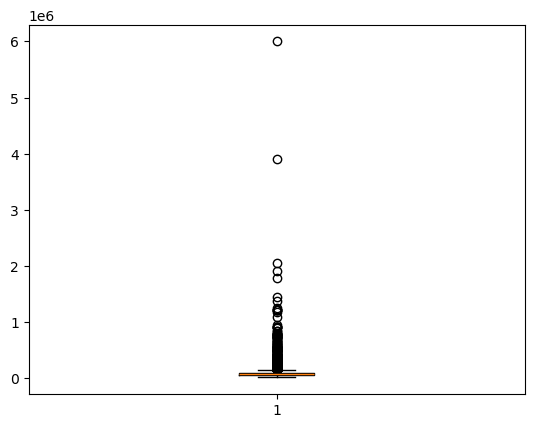

In [112]:
plt.boxplot(df.annual_inc)
plt.show()

In [114]:
#check whose annual incomes are more than 400000
df[df.annual_inc>400000]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt,pub_rec_bankruptcies
1319,30000,60 months,0.2030,799.84,E,E5,< 1 year,MORTGAGE,525000.0,Verified,...,8.50,0,Sep-00,0,14,0,75,42,0,0.0
1622,35000,60 months,0.1427,819.30,C,C2,1 year,MORTGAGE,550000.0,Verified,...,4.34,0,Jul-79,4,19,0,0.60,47,0,0.0
2647,35000,36 months,0.0790,1095.16,A,A4,10+ years,MORTGAGE,408000.0,Verified,...,9.93,0,Mar-92,0,11,0,18.10,35,0,0.0
3511,16000,36 months,0.0790,500.65,A,A4,3 years,MORTGAGE,480000.0,Source Verified,...,6.60,0,Jun-95,0,8,0,33.80,23,0,0.0
4590,30000,60 months,0.2211,830.45,G,G1,10+ years,MORTGAGE,725000.0,Verified,...,5.40,0,Feb-94,2,18,0,70.30,53,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,8450,36 months,0.1229,281.84,C,C5,< 1 year,RENT,2039784.0,Not Verified,...,0.13,0,Aug-04,1,7,0,51.80,11,0,0.0
36868,16000,36 months,0.0976,514.48,B,B2,10+ years,RENT,572400.0,Not Verified,...,1.61,0,Aug-90,1,17,0,27.30,30,0,0.0
37208,2500,36 months,0.0743,77.69,A,A2,10+ years,MORTGAGE,522000.0,Not Verified,...,2.45,1,Nov-90,5,13,0,9.40,44,0,0.0
37324,25000,36 months,0.0901,795.11,B,B2,10+ years,MORTGAGE,616000.0,Not Verified,...,3.83,0,Nov-97,5,12,0,6.60,43,0,0.0


In [116]:
#removing all the outliners whose income is more than 135000
df = df[df.annual_inc<=135000]

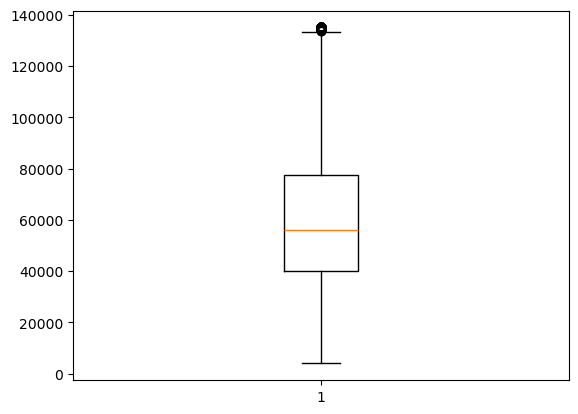

In [118]:
plt.boxplot(df.annual_inc)
plt.show()

In [120]:
df.annual_inc.describe()

count     35310.000000
mean      60811.485085
std       26909.601732
min        4000.000000
25%       40000.000000
50%       56040.500000
75%       77396.297500
max      135000.000000
Name: annual_inc, dtype: float64

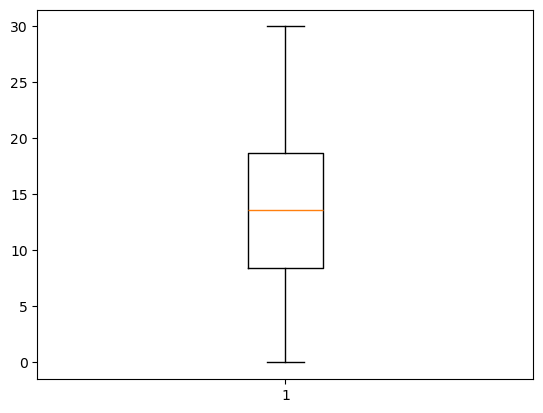

In [122]:
plt.boxplot(df.dti)
plt.show()

#### Observation: 
Here it is observed that dti is largely above 1, so an impression can be drawn that the borrower is over-leveraged or relying too heavily on credit to meet their financial needs. This could indicate underlying financial issues that may need to be addressed.

### Analysing Loan Status

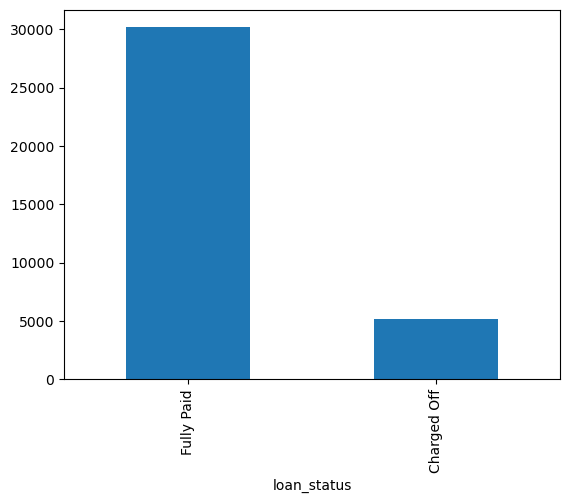

In [124]:
loan_status_counts = df['loan_status'].value_counts()
loan_status_counts.plot(kind='bar')
plt.show()

### Observation: 
Charged off loans are nearly 4500 - 5000 over 30000 loan takers, which means that nearly 14-16% are defaulters.

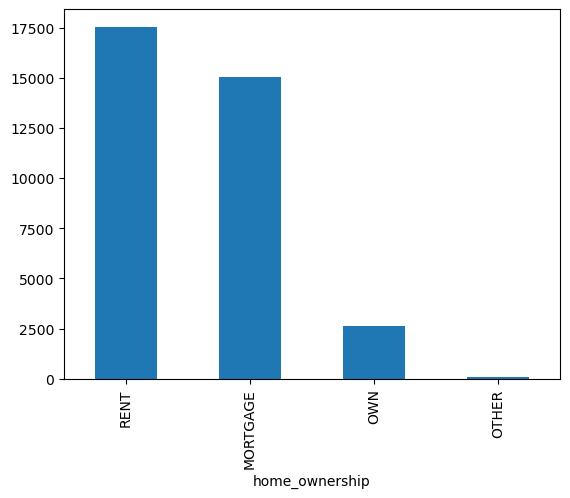

In [126]:
value_counts = df['home_ownership'].value_counts()
value_counts.plot(kind='bar')
plt.show()

### Analysing Home Ownership Status for Charged off Loans

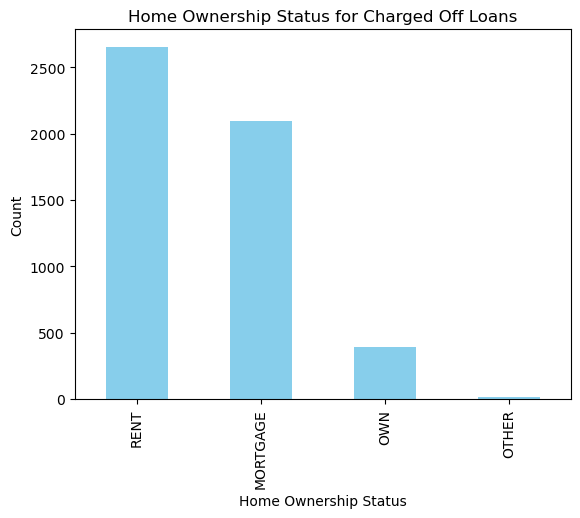

In [128]:
charged_off_data = df[df['loan_status'] == 'Charged Off']
home_ownership_counts = charged_off_data['home_ownership'].value_counts()
home_ownership_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.title('Home Ownership Status for Charged Off Loans')
plt.show()

#### Observation:
It has been observed that people who live in rent, tend to charge off loans. Second category belongs to people who have mortgaged their loans.

### Analysing Vertification status for Charged Off Loans

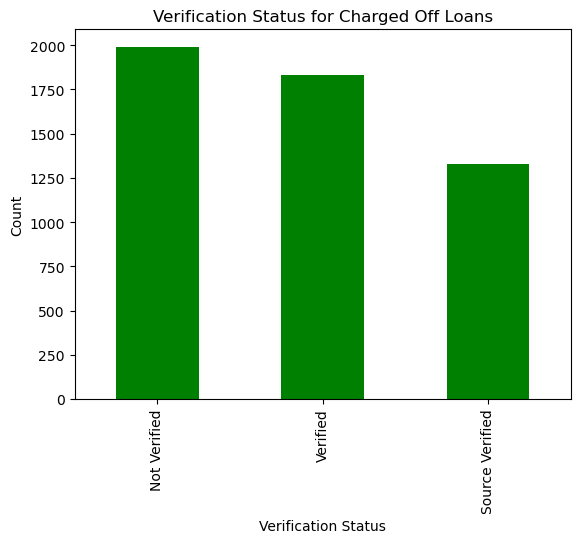

In [130]:
verification_counts = charged_off_data['verification_status'].value_counts()
verification_counts.plot(kind='bar', color='g')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Verification Status for Charged Off Loans')
plt.show()

#### Observation: 
People who are not verified by the team tend to charge off their loans.

### Analysing Loan Purpose of Charged off Loans

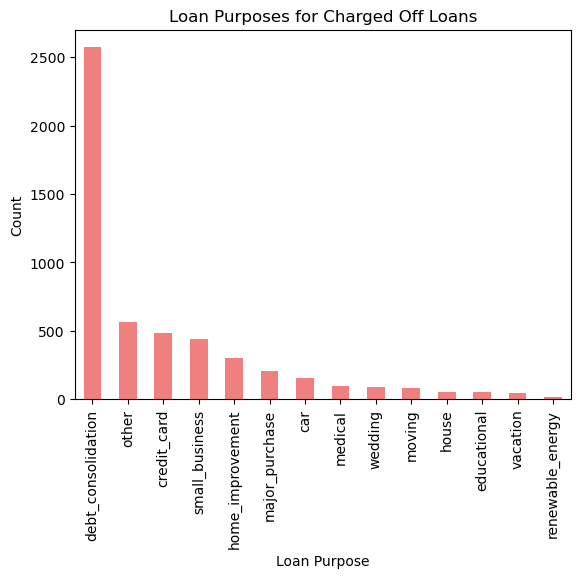

In [132]:
charged_off_purpose_counts = charged_off_data['purpose'].value_counts()
charged_off_purpose_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Purposes for Charged Off Loans')
plt.show()

#### Observation:
People who have taken loan for debt consolidation tend to default more than others.

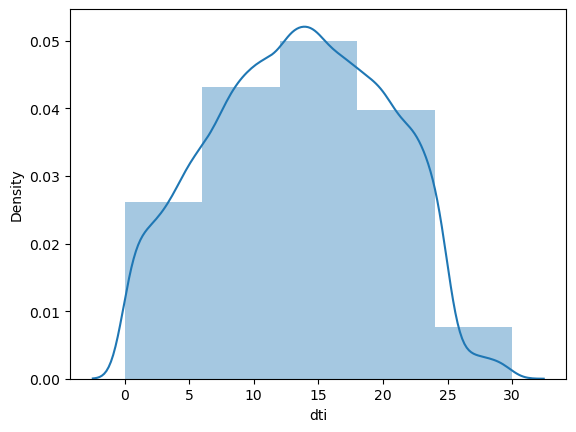

In [134]:
sns.distplot(df.dti, bins = 5)
plt.show()

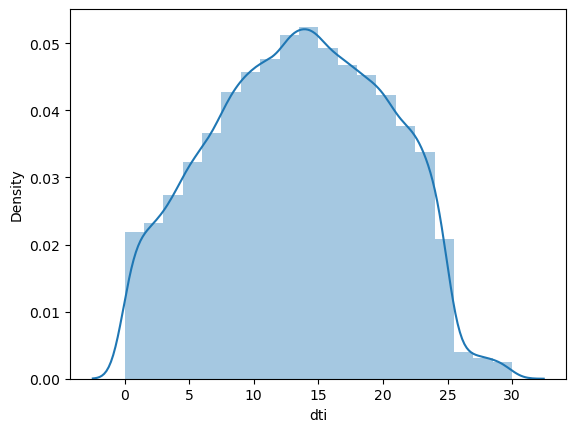

In [136]:
sns.distplot(df.dti, bins = 20)
plt.show()

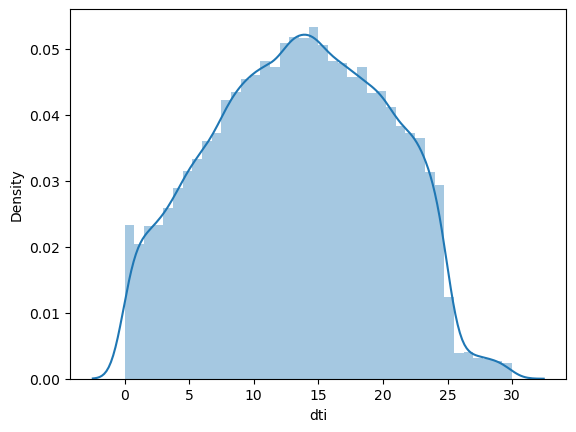

In [138]:
sns.distplot(df.dti, bins = 40)
plt.show()

#### Observation:
It has been observoed that a higher DTI ratio generally indicates that a borrower has a larger portion of their income allocated toward debt repayment. This can be a sign of financial strain and could imply that the borrower has less disposable income available for other needs or emergencies.

Let's take a look into the count plot below to analyse further.

### Count Plot - DTI vs Charged off

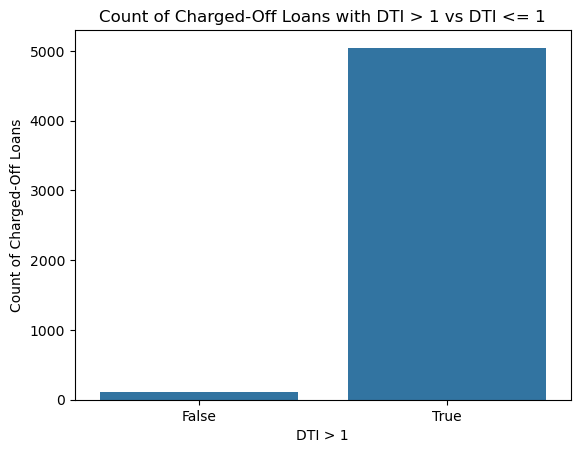

In [140]:
charged_off_data['dti_above_1'] = charged_off_data['dti'] > 1
sns.countplot(x='dti_above_1', data=charged_off_data)
plt.title("Count of Charged-Off Loans with DTI > 1 vs DTI <= 1")
plt.xlabel("DTI > 1")
plt.ylabel("Count of Charged-Off Loans")
plt.show()

#### Observation:
The value which is true is identified as DTI where value is more than 1, and False is DTI < 1, which shows that DTI has a positive relationship with Charged off loans.

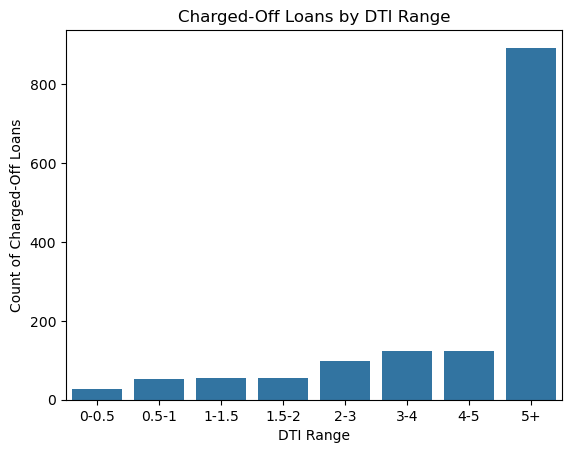

In [142]:
dti_bins = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 10]
dti_labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-3', '3-4', '4-5', '5+']
charged_off_data['dti_range'] = pd.cut(charged_off_data['dti'], bins=dti_bins, labels=dti_labels)
sns.countplot(x='dti_range', data=charged_off_data)
plt.title("Charged-Off Loans by DTI Range")
plt.xlabel("DTI Range")
plt.ylabel("Count of Charged-Off Loans")
plt.show()


### Observation: 
True (DTI > 1): The majority of charged-off loans fall into this category, suggesting that most of the loans that were charged off have a DTI greater than 1.

False (DTI ≤ 1): Fewer charged-off loans have a DTI of 1 or less, which indicates that lower DTI values are less common among the loans that were charged off.

Since most of the charged-off loans have a DTI greater than 1, it could imply that borrowers with a higher DTI are more likely to default or have their loans charged off. This makes sense because a higher DTI suggests that the borrower has more debt relative to their income, which could indicate financial strain and difficulty in repaying the loan.

Loans with a DTI greater than 2 show a substantial increase in charge-offs, while loans with DTI below 1 are less likely to be charged off.

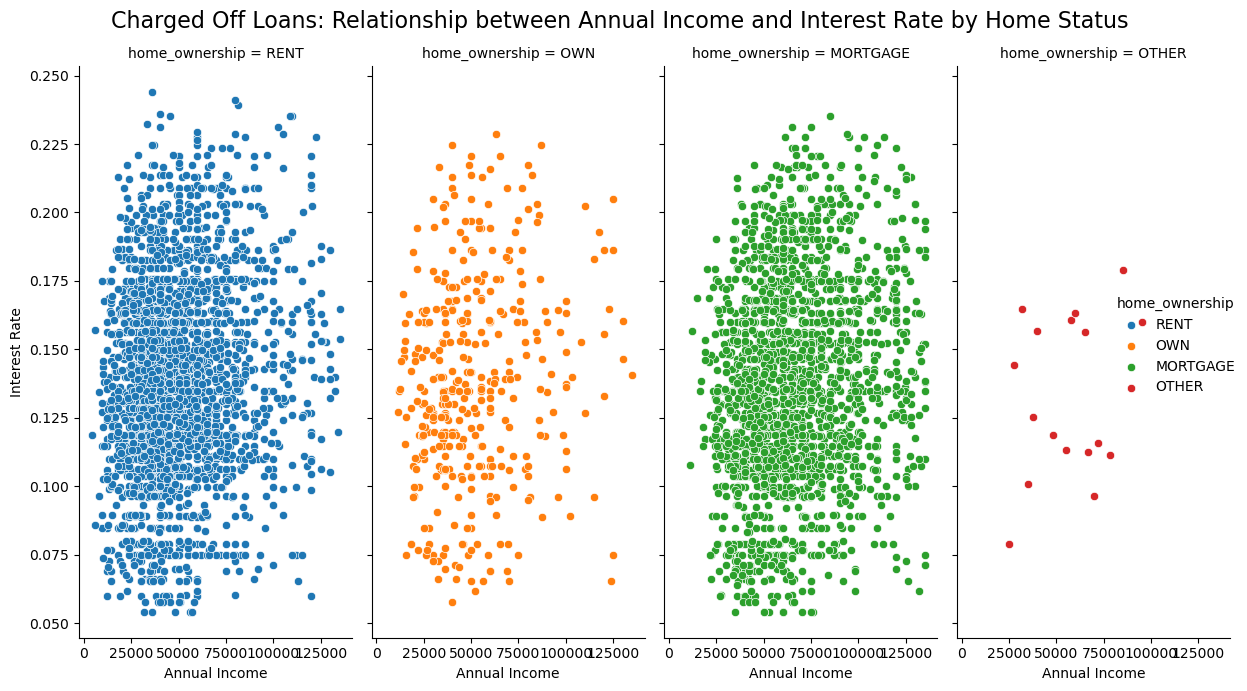

In [144]:

g = sns.FacetGrid(charged_off_data, col='home_ownership', hue='home_ownership', height=7, aspect=0.4)
g.map(sns.scatterplot, 'annual_inc', 'int_rate')
g.add_legend()
g.set_axis_labels('Annual Income', 'Interest Rate')
g.fig.suptitle('Charged Off Loans: Relationship between Annual Income and Interest Rate by Home Status', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust the top to make room for the suptitle
plt.show()

#### Observation:
1. An observation can be drawn from here that people with an annual income of between 25000 - 75000 are likely to default more.
2. Secondly, we can even see that people default more when the rate of interest is between 10% - 17.5%.

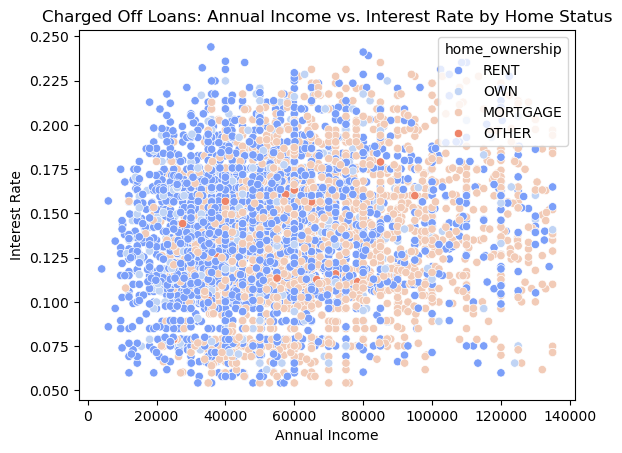

In [146]:
sns.scatterplot(data=charged_off_data, x='annual_inc', y='int_rate', hue='home_ownership', palette='coolwarm')
plt.title('Charged Off Loans: Annual Income vs. Interest Rate by Home Status')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.show()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35310 entries, 0 to 37486
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35310 non-null  int64  
 1   term                  35310 non-null  object 
 2   int_rate              35310 non-null  float64
 3   installment           35310 non-null  float64
 4   grade                 35310 non-null  object 
 5   sub_grade             35310 non-null  object 
 6   emp_length            35310 non-null  object 
 7   home_ownership        35310 non-null  object 
 8   annual_inc            35310 non-null  float64
 9   verification_status   35310 non-null  object 
 10  issue_d               35310 non-null  object 
 11  loan_status           35310 non-null  object 
 12  purpose               35310 non-null  object 
 13  title                 35310 non-null  object 
 14  dti                   35310 non-null  float64
 15  delinq_2yrs           35

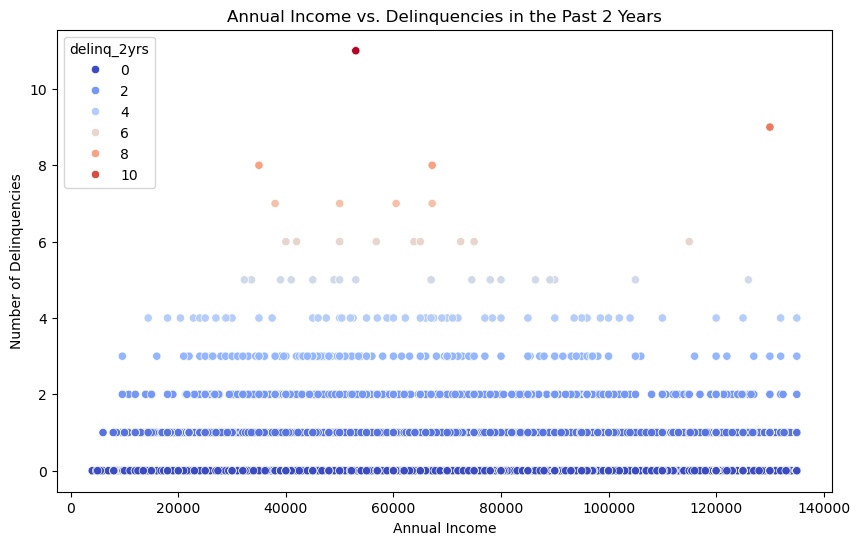

In [150]:
# Scatter plot to check the relationship between annual income and delinquencies
plt.figure(figsize=(10, 6))

sns.scatterplot(x='annual_inc', y='delinq_2yrs', data=df, hue='delinq_2yrs', palette='coolwarm')
plt.title('Annual Income vs. Delinquencies in the Past 2 Years')
plt.xlabel('Annual Income')
plt.ylabel('Number of Delinquencies')
plt.show()

#### Observation: 
Although the majority of people lies where delinquencies are 0, but still a portion of people whose delinquencies are more than 0 form a negative result, which maybe considered as to charged off category.

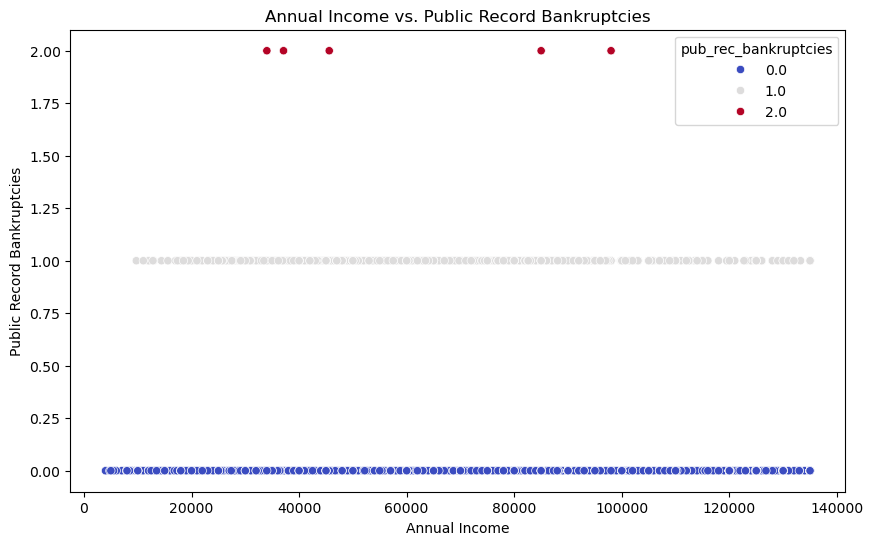

In [155]:
# Scatter plot to check the relationship between annual income and bankruptcies
plt.figure(figsize=(10, 6))

sns.scatterplot(x='annual_inc', y='pub_rec_bankruptcies', data=df, hue='pub_rec_bankruptcies', palette='coolwarm')
plt.title('Annual Income vs. Public Record Bankruptcies')
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.show()

#### Observation: 
Here, Public Record Bankruptcies are compared with the annual income of loan takers, and since a very small percentage of people(apart from their income level) are above 0, so any relationship couldn't be drawn with this.

Let's take a look into the relationship where charged off loans takes over annual income as a basis.

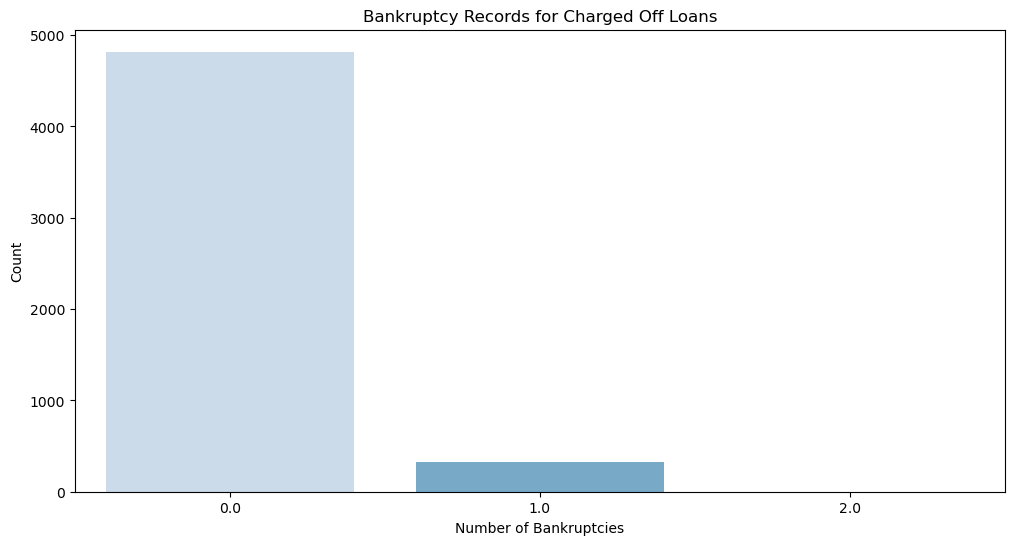

In [163]:
# Filter data to only show charged off loans
charged_off_df = df[df['loan_status'] == 'Charged Off']

# Visualize the relationship between charge-offs, bankruptcies, and delinquencies
plt.figure(figsize=(12, 6))

# Count plot for charge-offs and bankruptcies
sns.countplot(x='pub_rec_bankruptcies', data=charged_off_df, palette='Blues')
plt.title('Bankruptcy Records for Charged Off Loans')
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Count')
plt.show()


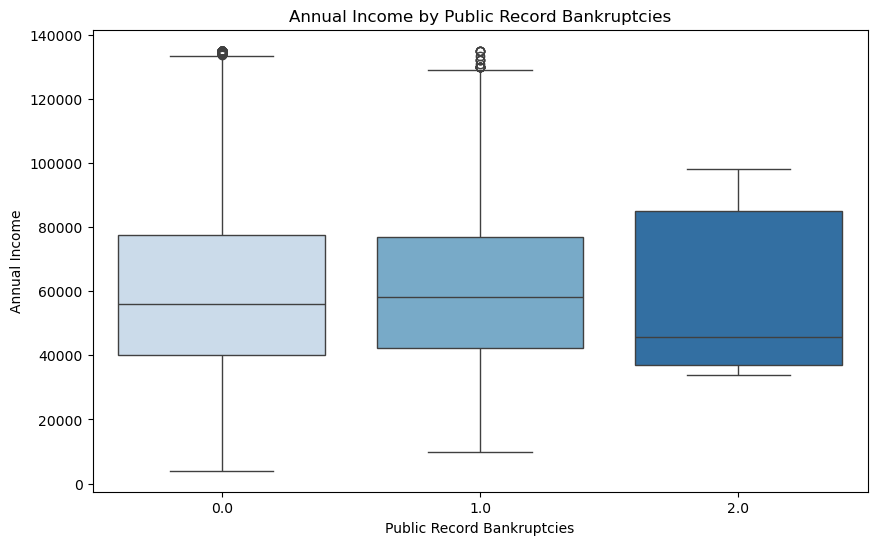

In [159]:
# Boxplot for annual income vs. bankruptcies
plt.figure(figsize=(10, 6))
sns.boxplot(x='pub_rec_bankruptcies', y='annual_inc', data=df, palette='Blues')
plt.title('Annual Income by Public Record Bankruptcies')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Annual Income')
plt.show()

#### Observations:
It has been observed that delinquency and public record bankruptcies cannot be taken as a reliable basis while calculating for charged off loans.

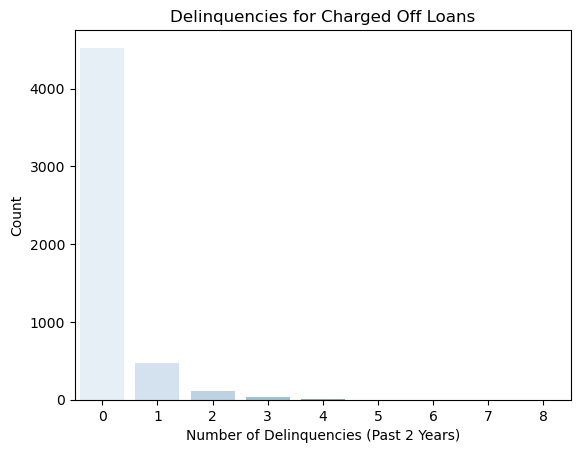

In [165]:
# Count plot for charge-offs and delinquencies
sns.countplot(x='delinq_2yrs', data=charged_off_df, palette='Blues')
plt.title('Delinquencies for Charged Off Loans')
plt.xlabel('Number of Delinquencies (Past 2 Years)')
plt.ylabel('Count')
plt.show()

#### Observation:
Our analysis found no significant relationship between charge-offs and bankruptcies or delinquencies. This suggests that the occurrence of a charge-off is not influenced by the number of bankruptcies or delinquencies in a borrower's credit history. Therefore, these factors do not appear to be strong predictors of charge-offs.

### Let's deep dive more into other factors / variables to better understand the drivers behind charged offs.

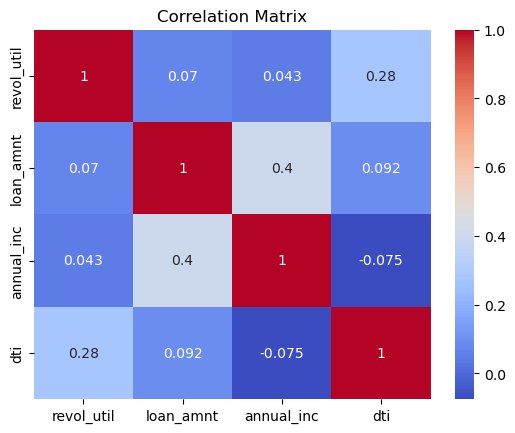

In [194]:
correlation_matrix = df[['revol_util', 'loan_amnt', 'annual_inc', 'dti']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Observation:
The negative correlation of -0.075 between annual income and revolving utilization rate suggests that higher income slightly reduces the need to use credit, but the relationship is weak. 

Other factors, such as debt-to-income ratio (DTI) and loan amount, show stronger positive correlations with utilization, indicating that individuals with higher debt burdens or larger loans are more likely to use more of their available credit. 

Although annual income plays a role in credit utilization, it is less significant compared to DTI and other financial factors. Therefore, charge-off risk is more closely related to these other variables than to income alone.